In [37]:
import pandas as pd
import plotly.express as px

In [64]:
df = pd.read_csv(r"https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni-latest.csv")

In [73]:
df.sort_values(by='data', ascending=False)
df['data'] = pd.to_datetime(df['data'],format='%Y-%m-%dT%H:%M:%S')
df['data'] = df['data'].dt.strftime('%d-%m-%Y')
dff = df[['data','denominazione_regione','ricoverati_con_sintomi','terapia_intensiva','totale_ospedalizzati']]
dff.sort_values(by='totale_ospedalizzati', ascending=False).head(5)

,data,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati
20,19-06-2024,Veneto,164,8,172
4,19-06-2024,Emilia-Romagna,79,1,80
3,19-06-2024,Campania,72,3,75
13,19-06-2024,Piemonte,73,0,73
6,19-06-2024,Lazio,64,2,66


In [74]:
df_melted = df.melt(id_vars='denominazione_regione', value_vars=['ricoverati_con_sintomi', 'terapia_intensiva'], var_name='categoria', value_name='numero')
df_melted.head(5)

,denominazione_regione,categoria,numero
0,Abruzzo,ricoverati_con_sintomi,2
1,Basilicata,ricoverati_con_sintomi,1
2,Calabria,ricoverati_con_sintomi,7
3,Campania,ricoverati_con_sintomi,72
4,Emilia-Romagna,ricoverati_con_sintomi,79


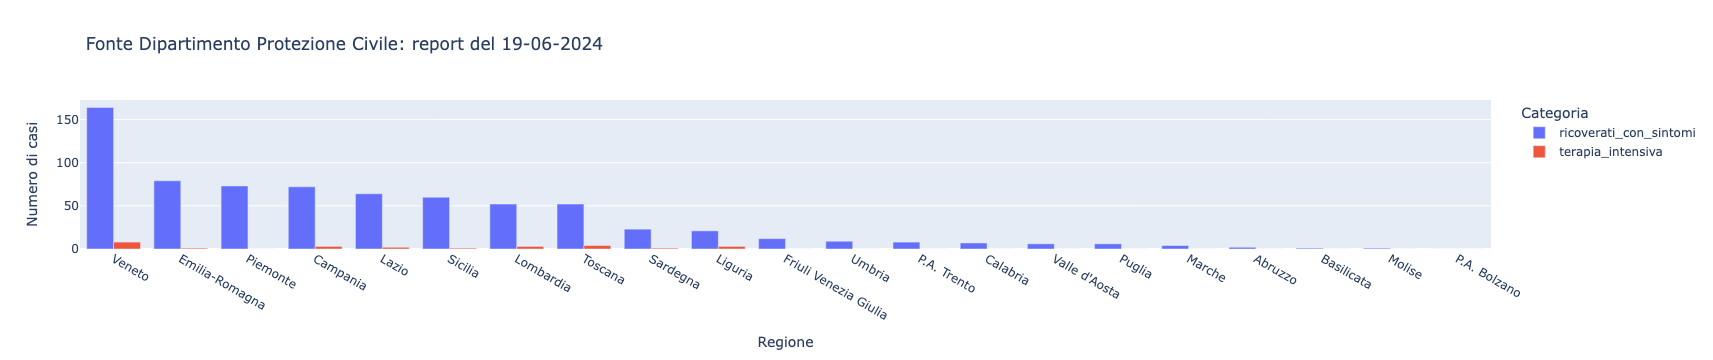

In [61]:
fig = px.bar(df_melted.sort_values(by='numero', ascending=False), 
             x='denominazione_regione', y='numero', color='categoria', 
             barmode='group', 
             title=f'Fonte Dipartimento Protezione Civile: report del {df['data'][0]}',
             labels={'numero':'Numero di casi', 'denominazione_regione':'Regione', 'categoria':'Categoria'})
             
fig.show()